# Decision Trees for Regression

## Data Loading and EDA

In [3]:
import pandas as pd
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape

(1197, 15)

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Data Cleaning

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
df_clean = df.copy()

In [9]:
df_clean.loc[df_clean['department']=='sweing','department'] = 'sewing'

In [10]:
df_clean.loc[df_clean['department']=='finishing ','department'] = 'finishing'

In [11]:
df_clean.loc[df_clean['wip'].isna(), 'wip'] = 0

In [12]:
df_clean.drop('date',axis=1, inplace=True)
df_clean.drop('quarter',axis=1, inplace=True)

1. We drop date and quarter as those are likely irrelevant to predicting productivity.

In [13]:
df_clean['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

In [14]:
df_clean

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [15]:
df_clean['productivity_hit'] = df_clean['targeted_productivity'] <= df_clean['actual_productivity']

In [16]:
df_clean['productivity_hit'].replace({True:1, False:0})
df_clean.drop('actual_productivity',axis=1, inplace=True)

In [17]:
categorical_cols = ['department','day']

onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df_clean[categorical_cols])
onehot_encoded_array = onehot_encoded.toarray()

encoded_cols = onehot_encoder.get_feature_names(categorical_cols)
df_encoded = pd.DataFrame(onehot_encoded_array, columns = encoded_cols)
df_encoded = pd.concat([df_clean, df_encoded], axis=1)
df_encoded.drop(categorical_cols, axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Building Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 

X = df_encoded.drop('productivity_hit',axis=1)
y = df_encoded['productivity_hit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [19]:
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X_train,y_train)
print(f'Training accuracy: {model.score(X_train,y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
tp = confusion[1][1]
tn = confusion[0][0]
fp = confusion[0][1]
fn = confusion[1][0]

sens = tp/(tp+fn)
spec = tn/(tn+fp)
prec = tp/(tp+fp)
npv = tn/(tn+fn)
print(f'Model Sensitivity: {sens}')
print(f'Model Specificity: {spec}')
print(f'Model Precision: {prec}')
print(f'Model NPV: {npv}')

Training accuracy: 0.799373040752351
Test accuracy: 0.7875
Model Sensitivity: 0.9717514124293786
Model Specificity: 0.2698412698412698
Model Precision: 0.7889908256880734
Model NPV: 0.7727272727272727


In [20]:
score = cross_val_score(model, X, y, cv=5, n_jobs=-1)
score.mean()

0.7802615062761505

1. Our model performs almost as well on the test set as it does on the training set, suggesting that we may have avoided overfitting. This is a good sign.
2. Our model is very good at predicting positive cases well (high sensitivity).
3. Our model is not great at predicting negative cases well (low speicficity).
4. We have reasonably good precision and NPV.
5. The low specificity is concerning because we likely wish to use this model to identify which employees are not going to hit productivity targets. In this case, we would probably want to be less conservative in making positive predictions and more conservative in making negative predictions.

#### Model Tuning
1. Let's weight the negative cases more strongly so that we get a better model with higher specificity, even if it may possibly come with a tradeoff of lower NPV. For a real world use case, we would use this model to identify employees that are at risk for not hitting productivity targets and monitor them more closely. Given that we will be more conservative with negative predictions, we will likely have more false negatives, so this should be kept in mind.

In [76]:
class_weights = {0: 2, 1: 1}
model = RandomForestClassifier(max_depth=3, class_weight = class_weights, random_state=42)
model.fit(X_train,y_train)
print(f'Training accuracy: {model.score(X_train,y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
tp = confusion[1][1]
tn = confusion[0][0]
fp = confusion[0][1]
fn = confusion[1][0]

sens = tp/(tp+fn)
spec = tn/(tn+fp)
prec = tp/(tp+fp)
npv = tn/(tn+fn)
print(f'Model Sensitivity: {sens}')
print(f'Model Specificity: {spec}')
print(f'Model Precision: {prec}')
print(f'Model NPV: {npv}')

Training accuracy: 0.7732497387669801
Test accuracy: 0.7541666666666667
Model Sensitivity: 0.7966101694915254
Model Specificity: 0.6349206349206349
Model Precision: 0.8597560975609756
Model NPV: 0.5263157894736842


#### Model Tuning
1. We do indeed see a sharp increase in specificity if we weigh the negative cases twice as heavily as the positive cases, as well as see the expected drop in NPV as we trade true positives for false negatives. This model is much more balanced compared to the previous model and seems to be an improvement. Given that we likely value specificity over sensitivity, let's see if we can further improve this metric with further tuning.

#### Max Depth Tuning

1. Let's perform a grid search to find the optimal combination of max depth and class weights that maximize specificity. We use a custom scorer to do so and include the caveat that it must result in an accuracy score of over 0.70, our minimum threshold for an acceptable model. 

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

class_weights = []
for i in range(1,6):
    class_weights.append({0:i, 1:1})
    
param_grid = { 
    'max_depth': list(range(1,11)),
    'class_weight':class_weights
             }

def specificity_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    # specify minimum threshold for accuracy at 0.7
    if accuracy < 0.7:
        return 0
    else:
        return specificity

model = RandomForestClassifier(random_state=42)
spec_scorer = make_scorer(specificity_scorer, greater_is_better=True)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=spec_scorer)
grid_search.fit(X_train, y_train)

      

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 2, 1: 1},
                                          {0: 3, 1: 1}, {0: 4, 1: 1},
                                          {0: 5, 1: 1}],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=make_scorer(specificity_scorer))

In [75]:
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
depth_values = results['param_max_depth']
weight_values = results['param_class_weight']
data = [[depth, weight, score] for score, depth, weight in zip(mean_scores, depth_values, weight_values)]
sorted_data = sorted(data, key=lambda x: x[2], reverse=True) 

for depth, weight, score in sorted_data:
    print(f"Max Depth = {depth}, Class_weights = {weight}, Mean Spec = {score.round(5)}")
    

Max Depth = 7, Class_weights = {0: 4, 1: 1}, Mean Spec = 0.7181
Max Depth = 6, Class_weights = {0: 3, 1: 1}, Mean Spec = 0.70256
Max Depth = 8, Class_weights = {0: 5, 1: 1}, Mean Spec = 0.69472
Max Depth = 7, Class_weights = {0: 3, 1: 1}, Mean Spec = 0.67949
Max Depth = 8, Class_weights = {0: 4, 1: 1}, Mean Spec = 0.67149
Max Depth = 9, Class_weights = {0: 5, 1: 1}, Mean Spec = 0.66787
Max Depth = 8, Class_weights = {0: 3, 1: 1}, Mean Spec = 0.65611
Max Depth = 9, Class_weights = {0: 4, 1: 1}, Mean Spec = 0.64465
Max Depth = 4, Class_weights = {0: 2, 1: 1}, Mean Spec = 0.64095
Max Depth = 3, Class_weights = {0: 2, 1: 1}, Mean Spec = 0.63718
Max Depth = 9, Class_weights = {0: 3, 1: 1}, Mean Spec = 0.62926
Max Depth = 6, Class_weights = {0: 4, 1: 1}, Mean Spec = 0.62308
Max Depth = 7, Class_weights = {0: 5, 1: 1}, Mean Spec = 0.62308
Max Depth = 5, Class_weights = {0: 2, 1: 1}, Mean Spec = 0.62142
Max Depth = 6, Class_weights = {0: 2, 1: 1}, Mean Spec = 0.6175
Max Depth = 7, Class_weight

#### Takeaways
1. We see that the best mean specificities are associated with increased max depth. 
2. Mean specificity does not tell us everything though, let's take all grid points that resulted in a mean spec > 0.65 and look at our binary classification metrics to get a bigger picture on the performance of our models with these combinations of parameters.

In [80]:
data = pd.DataFrame(sorted_data, columns = ['Depth', 'Weight', 'Spec'])
data_truncated = data.copy()
data_truncated = data_truncated[data_truncated['Spec'] >= 0.65]
data_truncated['Neg_Weight'] = data_truncated['Weight'].apply(lambda x: x.get(0))
data_truncated['Pos_Weight'] = data_truncated['Weight'].apply(lambda x: x.get(1))
depths = data_truncated['Depth']
neg_weights = data_truncated['Neg_Weight']
pos_weights = data_truncated['Pos_Weight']
scores = data_truncated['Spec']

data_truncated

params_all = []
for i in range(len(depths)):
    params_all.append([depths[i],neg_weights[i],pos_weights[i]])

param_metrics = {}   
for params in params_all:
    depth = params[0]
    neg_weight = params[1]
    pos_weight = params[2]
    model = RandomForestClassifier(random_state=42, max_depth = depth, class_weight = {0: neg_weight, 1:pos_weight})
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    tp = confusion[1][1]
    tn = confusion[0][0]
    fp = confusion[0][1]
    fn = confusion[1][0]

    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    prec = tp/(tp+fp)
    npv = tn/(tn+fn)
    score = model.score(X_test,y_test)
    
    key = tuple([depth, neg_weight,pos_weight])
    metrics = [sens, spec, prec, npv, score]
    param_metrics[key] = metrics


#### Pre-visualization Discussion
1. We took all hyperparameter combinations found in our grid search that scored on sensitivity and created a dictionary with keys in tuple containing our parameters in the form (depth, negative weight, postiive weight) and the values containing our various metrics in the form [sensitivity, specificity, precision, npv, score]
2. Lets plot these to visualize how our models perform when we adjust these parameters.

In [125]:
senss = []
specs = []
precs = []
npvs = []
scores = []
for key in param_metrics.keys():
    senss.append(param_metrics[key][0])
    specs.append(param_metrics[key][1])
    precs.append(param_metrics[key][2])
    npvs.append(param_metrics[key][3])
    scores.append(param_metrics[key][4])

metrics_df = pd.DataFrame()
metrics_df['(d,nw,pw)'] = param_metrics.keys()
metrics_df['(d,nw,pw)'] = metrics_df['(d,nw,pw)'].apply(lambda x: f'{list(x)[0]}, {{0: {list(x)[1]}, 1: {list(x)[2]}}}')
metrics_df['sens'] = senss
metrics_df['spec'] = specs
metrics_df['prec'] = precs
metrics_df['npv'] = npvs
metrics_df['accuracy'] = scores
metrics_df

,"(d,nw,pw)",sens,spec,prec,npv,accuracy
0,"7, {0: 4, 1: 1}",0.785311,0.793651,0.914474,0.568182,0.787500
1,"6, {0: 3, 1: 1}",0.779661,0.730159,0.890323,0.541176,0.766667
2,"8, {0: 5, 1: 1}",0.807910,0.777778,0.910828,0.590361,0.800000
3,"7, {0: 3, 1: 1}",0.830508,0.746032,0.901840,0.610390,0.808333
4,"8, {0: 4, 1: 1}",0.813559,0.746032,0.900000,0.587500,0.795833
5,"9, {0: 5, 1: 1}",0.836158,0.761905,0.907975,0.623377,0.816667
6,"8, {0: 3, 1: 1}",0.847458,0.746032,0.903614,0.635135,0.820833


In [126]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Metrics Performance for Various Parameter Combinations (max_depth, class_weight)')

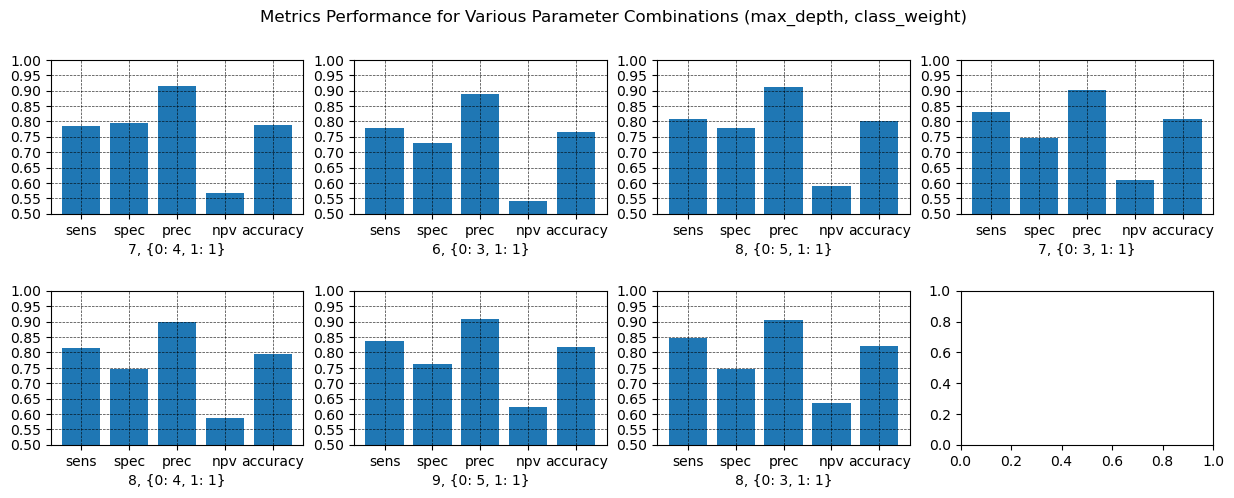

In [138]:
fig, ax = plt.subplots(2,4, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
metrics = ['sens', 'spec', 'prec', 'npv', 'accuracy']
for i in range(7):
    x = None
    y = i//4
    if y == 1:
        x = i-4
    else:
        x = i
    ax[y,x].bar(metrics, metrics_df[['sens','spec','prec','npv','accuracy']].iloc[i, :])
    ax[y,x].set_xlabel(metrics_df.loc[i,'(d,nw,pw)'])
    ax[y,x].set_ylim(0.5,1)
    ax[y,x].grid(True, which='major', linestyle='--', linewidth=0.5, color='black', alpha=0.8)
    ax[y,x].yaxis.set_major_locator(plt.MultipleLocator(0.05))
fig.suptitle('Metrics Performance for Various Parameter Combinations (max_depth, class_weight)')


#### Final Thoughts
1. Depending how conservative the business wants to be in identifying negative vs. positive cases, all the above parameter combinations will result in a model that prioritizes specificity but still retains an acceptable accuracy. We see that for all combinations, sensitivity and precision still remain high, and the only metric that had a tradeoff was NPV, something that we had expected when prioritizing specificity.